# STEP BY STEP IMPLEMENTATION OF MACHINE LEARNING ON REAL WORLD DATASET

# Machine Learning Project Part 1

### Introduction: 

In this project, we will work with publicly available building energy data from New York City.

The objective is to use the energy data to build a model that can predict __the Energy Star Score__ of a building and interpret the results to find the factors which influence the score.

The data includes the Energy Star Score, which makes this a supervised regression machine learning task:

Supervised: we have access to both the features and the target and our goal is to train a model that can learn a mapping between the two
Regression: The Energy Star score is a continuous variable

We want to develop a model that is both accurate — it can predict the Energy Star Score close to the true value — and interpretable — we can understand the model predictions. Once we know the goal, we can use it to guide our decisions as we dig into the data and build models.

## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant:

    1. Data cleaning and formatting
    2. Exploratory data analysis
    3. Feature engineering and selection
    4. Establish a baseline and compare several machine learning models on a performance metric
    5. Perform hyperparameter tuning on the best model to optimize it for the problem
    6. Evaluate the best model on the testing set
    7. Interpret the model results to the extent possible
    8. Draw conclusions and write a well-documented report


Throughout this project, the objective is to show how all the different data science practices come together to form a complete project. I try to focus more on the implementations of the methods rather than explaining them at a low-level.

### Imports

We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.


In [1]:
# Import required libraries

# Pandas and numpy for data manipulation
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import missingno as msno
print('Done')

Done


## 1. Data Cleaning and Formatting

In [29]:
data = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\1\SQL&TABLEAU\Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv', index_col = 'Order')

# Display top of dataframe
data.head(10)
#perse_date = True

,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10

Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 60 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the number in the ` ENERGY STAR score` column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand. In machine learning, this isn't actually a problem, because we let the model decide which features are important.

In [30]:
# lets check the dimension of our data
nrows, ncols = data.shape
print(f'We have {nrows} observations and {ncols} features')

We have 11746 observations and 59 features


In [31]:
# Let's view our columns name
data.columns

Index(['Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normal

we can see that our columns are not in good format name, we need to replace all the empty space between the column to underscore

In [32]:
# Replacing the empty space between our columns name with undescore
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Property_Id', 'Property_Name', 'Parent_Property_Id',
       'Parent_Property_Name', 'BBL_-_10_digits',
       'NYC_Borough,_Block_and_Lot_(BBL)_self-reported',
       'NYC_Building_Identification_Number_(BIN)', 'Address_1_(self-reported)',
       'Address_2', 'Postal_Code', 'Street_Number', 'Street_Name', 'Borough',
       'DOF_Gross_Floor_Area', 'Primary_Property_Type_-_Self_Selected',
       'List_of_All_Property_Use_Types_at_Property',
       'Largest_Property_Use_Type',
       'Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)',
       '2nd_Largest_Property_Use_Type',
       '2nd_Largest_Property_Use_-_Gross_Floor_Area_(ft²)',
       '3rd_Largest_Property_Use_Type',
       '3rd_Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)', 'Year_Built',
       'Number_of_Buildings_-_Self-reported', 'Occupancy',
       'Metered_Areas_(Energy)', 'Metered_Areas__(Water)', 'ENERGY_STAR_Score',
       'Site_EUI_(kBtu/ft²)', 'Weather_Normalized_Site_EUI_(kBtu/ft²)',
       'Weather_Normal

Now we are good to go!

#### checing the data type and missing values

The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "Not Available" rather than as np.nan (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [33]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11746 entries, 1 to 14993
Data columns (total 59 columns):
Property_Id                                                   11746 non-null int64
Property_Name                                                 11746 non-null object
Parent_Property_Id                                            11746 non-null object
Parent_Property_Name                                          11746 non-null object
BBL_-_10_digits                                               11695 non-null float64
NYC_Borough,_Block_and_Lot_(BBL)_self-reported                11746 non-null object
NYC_Building_Identification_Number_(BIN)                      11746 non-null object
Address_1_(self-reported)                                     11746 non-null object
Address_2                                                     11746 non-null object
Postal_Code                                                   11746 non-null object
Street_Number                                      

Let's replace all Not Available with numpy not a number

In [34]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

There are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to float datatype before we can do any numerical analysis.

#### Convert Data to Correct Types

In [35]:
# let's view all columns with object data type
data.select_dtypes('object')

,Property_Name,Parent_Property_Id,Parent_Property_Name,"NYC_Borough,_Block_and_Lot_(BBL)_self-reported",NYC_Building_Identification_Number_(BIN),Address_1_(self-reported),Address_2,Postal_Code,Street_Name,Borough,Primary_Property_Type_-_Self_Selected,List_of_All_Property_Use_Types_at_Property,Largest_Property_Use_Type,2nd_Largest_Property_Use_Type,2nd_Largest_Property_Use_-_Gross_Floor_Area_(ft²),3rd_Largest_Property_Use_Type,3rd_Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²),Metered_Areas_(Energy),Metered_Areas__(Water),ENERGY_STAR_Score,Weather_Normalized_Site_EUI_(kBtu/ft²),Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²),Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²),Weather_Normalized_Source_EUI_(kBtu/ft²),Fuel_Oil_#1_Use_(kBtu),Fuel_Oil_#2_Use_(kBtu),Fuel_Oil_#4_Use_(kBtu),Fuel_Oil_#5_&_6_Use_(kBtu),Diesel_#2_Use_(kBtu),District_Steam_Use_(kBtu),Natural_Gas_Use_(kBtu),Weather_Normalized_Site_Natural_Gas_Use_(therms),Weather_Normalized_Site_Electricity_(kWh),Water_Use_(All_Water_Sources)_(kgal),Water_Intensity_(All_Water_Sources)_(gal/ft²),Release_Date,Water_Required?,DOF_Benchmarking_Submission_Status,NTA
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,201/205,13286,201/205,1013160001,1037549,201/205 East 42nd st.,NaN,10017,3 AVENUE,Manhattan,Office,Office,Office,NaN,NaN,NaN,NaN,Whole Building,NaN,NaN,303.1,37.8,NaN,614.2,NaN,NaN,NaN,NaN,NaN,5.15506751E7,NaN,NaN,1.10827705E7,NaN,NaN,05/01/2017 05:32:03 PM,No,In Compliance,Turtle Bay-East Midtown ...
2,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,NaN,NaN,Whole Building,Whole Building,55,228.8,24.8,2.4,401.1,NaN,1.96248472E7,NaN,NaN,NaN,-3.914148026E8,933073441,9330734.4,9.62613121E7,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
3,MSCHoNY North,28400,NYP Columbia (West Campus),1-02138-0030,1063380,3975 Broadway,NaN,10032,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
4,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
5,Neuro Institute,28400,NYP Columbia (West Campus),1-02139-0085,1063403,710 West 168th Street,NaN,10032,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
6,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1-01480-0001,1084781; 1084780,525 East 68th Street,NaN,10021,YORK AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,NaN,NaN,Whole Building,Whole Building,55,359,8.3,4.8,411.5,NaN,2.00832154E7,NaN,NaN,NaN,-4.690796909E8,1.4322508769E9,1.43225088E7,2.45508594E7,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Lenox Hill-Roosevelt Island ...
7,Annex Building & Garage,28402,NYP Cornell (East Campus),1-01482-0040,1081252,523 East 70th St,515 East 70th St,10021,EAST 71 STREET,Manhattan,Mixed Use Property,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Converting all columns that should be numeric to float data type

In [36]:
# Iterate through the columns
for col in list(data.columns):
    
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        
        # Convert the data type to float
        data[col] = data[col].astype(float)

checking the statistical description of our data

In [37]:
# Statistical descriptions
data.describe()

,Property_Id,BBL_-_10_digits,Street_Number,DOF_Gross_Floor_Area,Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²),2nd_Largest_Property_Use_-_Gross_Floor_Area_(ft²),3rd_Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²),Year_Built,Number_of_Buildings_-_Self-reported,Occupancy,ENERGY_STAR_Score,Site_EUI_(kBtu/ft²),Weather_Normalized_Site_EUI_(kBtu/ft²),Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²),Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²),Weather_Normalized_Source_EUI_(kBtu/ft²),Fuel_Oil_#1_Use_(kBtu),Fuel_Oil_#2_Use_(kBtu),Fuel_Oil_#4_Use_(kBtu),Fuel_Oil_#5_&_6_Use_(kBtu),Diesel_#2_Use_(kBtu),District_Steam_Use_(kBtu),Natural_Gas_Use_(kBtu),Weather_Normalized_Site_Natural_Gas_Use_(therms),Electricity_Use_-_Grid_Purchase_(kBtu),Weather_Normalized_Site_Electricity_(kWh),Total_GHG_Emissions_(Metric_Tons_CO2e),Direct_GHG_Emissions_(Metric_Tons_CO2e),Indirect_GHG_Emissions_(Metric_Tons_CO2e),Property_GFA_-_Self-Reported_(ft²),Water_Use_(All_Water_Sources)_(kgal),Water_Intensity_(All_Water_Sources)_(gal/ft²),Source_EUI_(kBtu/ft²),Latitude,Longitude,Community_Board,Council_District,Census_Tract
count,1.174600e+04,1.169500e+04,9560.000000,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,3.642958e+06,2.178124e+09,1007.087343,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,1.049070e+06,1.222326e+09,1577.529413,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,7.365000e+03,1.000048e+09,1.000000,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,2.747222e+06,1.012930e+09,150.000000,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,3.236404e+06,2.028770e+09,446.000000,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,4.409092e+06,3.064149e+09,1304.500000,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97

#### Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [38]:
total = data.isnull().sum().sort_values(ascending = False)
perct = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
missg = pd.concat([total, perct], axis = 1, keys = ['Total', 'Percent'])
missing = missg[missg['Total'] > 0]
missing

,Total,Percent
Fuel_Oil_#1_Use_(kBtu),11737,99.923378
Diesel_#2_Use_(kBtu),11730,99.863783
Address_2,11539,98.237698
Fuel_Oil_#5_&_6_Use_(kBtu),11152,94.942959
District_Steam_Use_(kBtu),10810,92.031330
Fuel_Oil_#4_Use_(kBtu),10425,88.753618
3rd_Largest_Property_Use_Type,10262,87.365912
3rd_Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²),10262,87.365912
Fuel_Oil_#2_Use_(kBtu),9165,78.026562
2nd_Largest_Property_Use_-_Gross_Floor_Area_(ft²),8005,68.150860


Let's visualize our missing column, in order to check relationship of missing columns to one another

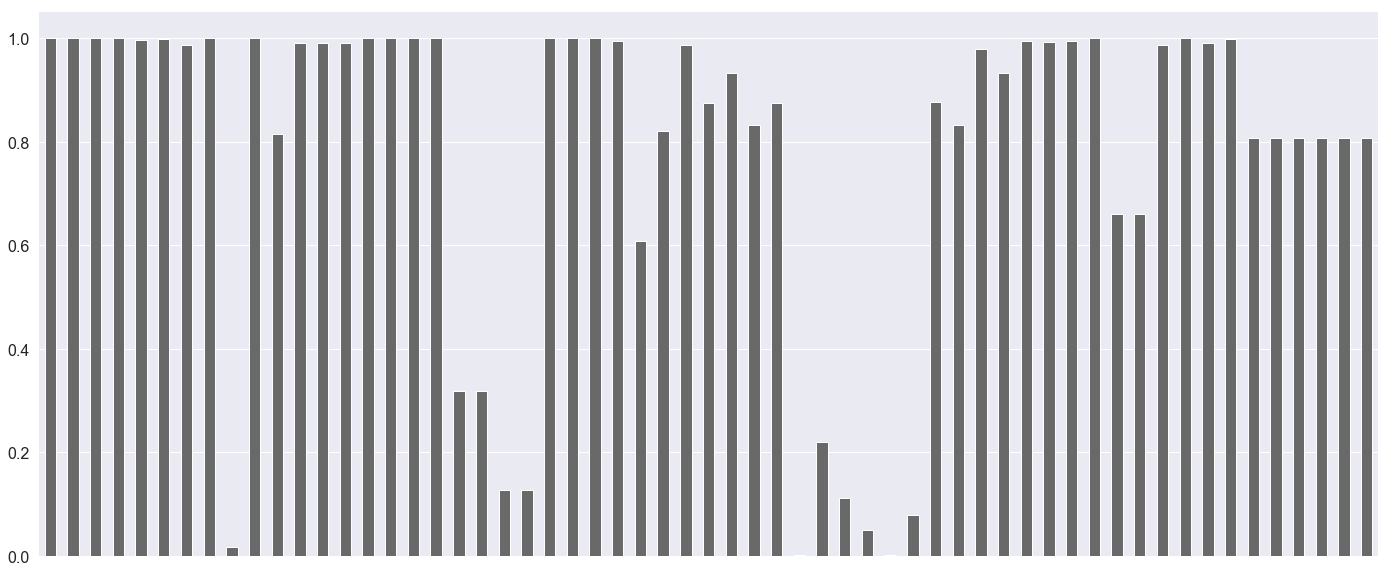

In [39]:
msno.bar(data)

In [20]:
#msno.matrix(data)

Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary and subjective, but for this project, we will remove any columns with more than 50% missing values. In general, be careful about dropping any information because even if it is not there for all the observations, it may still be useful for predicting the target value.

In [40]:
# Get the columns with > 50% missing
#missing_df = missing_values_table(data);
missing_columns = list(missing[missing['Percent'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

We will remove 11 columns.


In [41]:
# Drop the columns missing columns that are more than 50%
data = data.drop(columns = list(missing_columns))
#data.info()

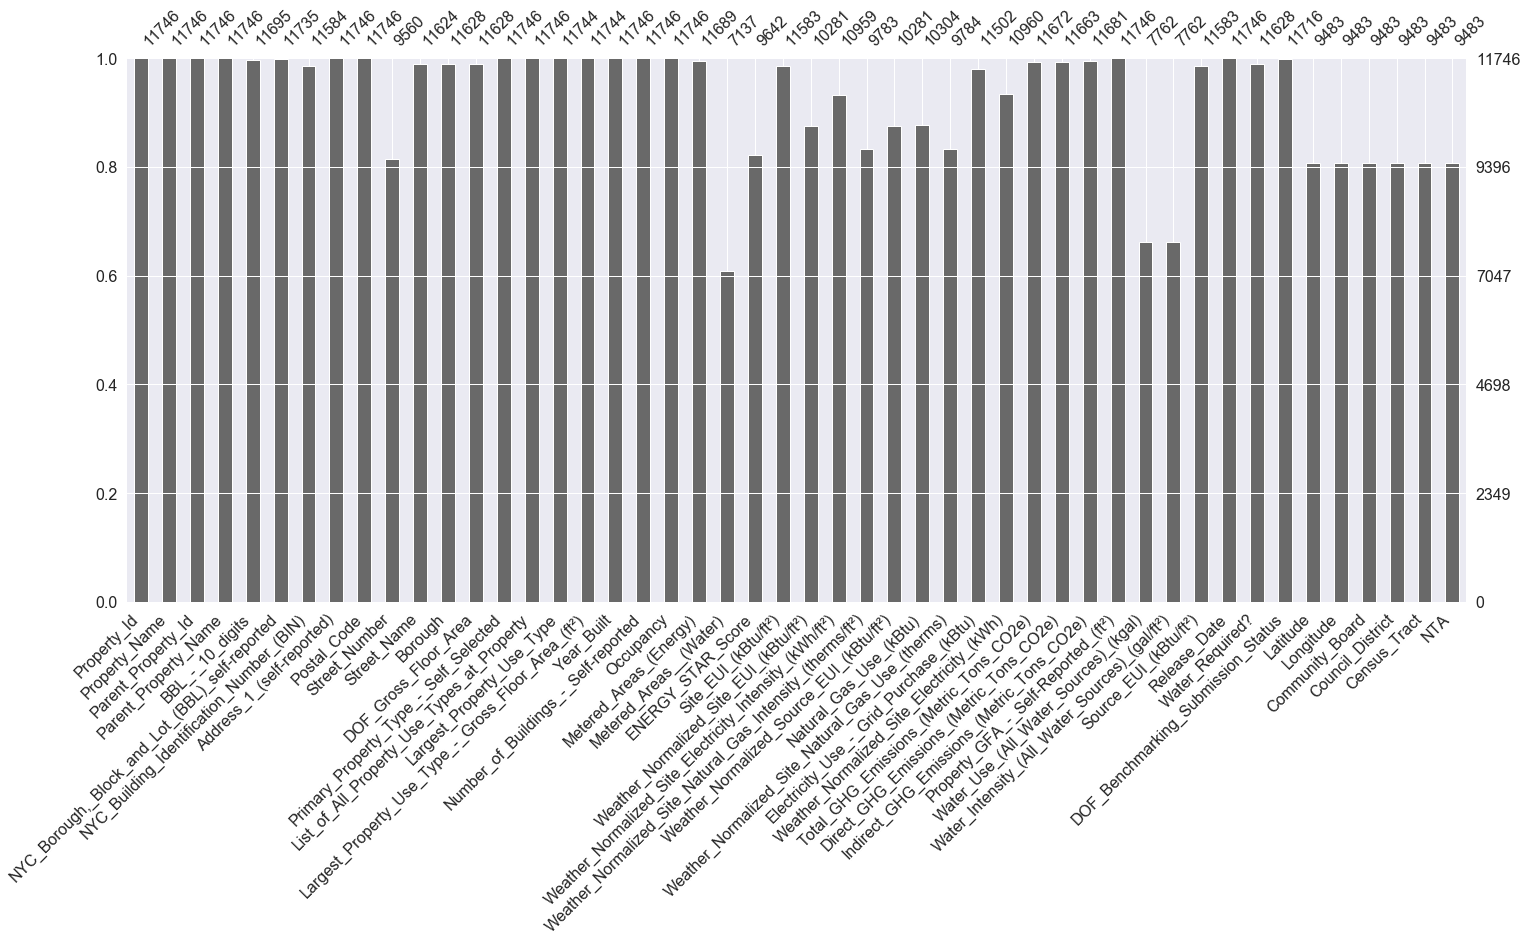

In [42]:
# recheck our missing columns
msno.bar(data)

we can see that columns that are more than 50% null values have been droped

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to score for simplicity and then start exploring this value.

In [45]:
# Rename our target variable
data = data.rename(columns = {'ENERGY_STAR_Score': 'score'})

Let's show a single variable plot of our target variable

In [46]:
data.score.isnull().sum()

2104

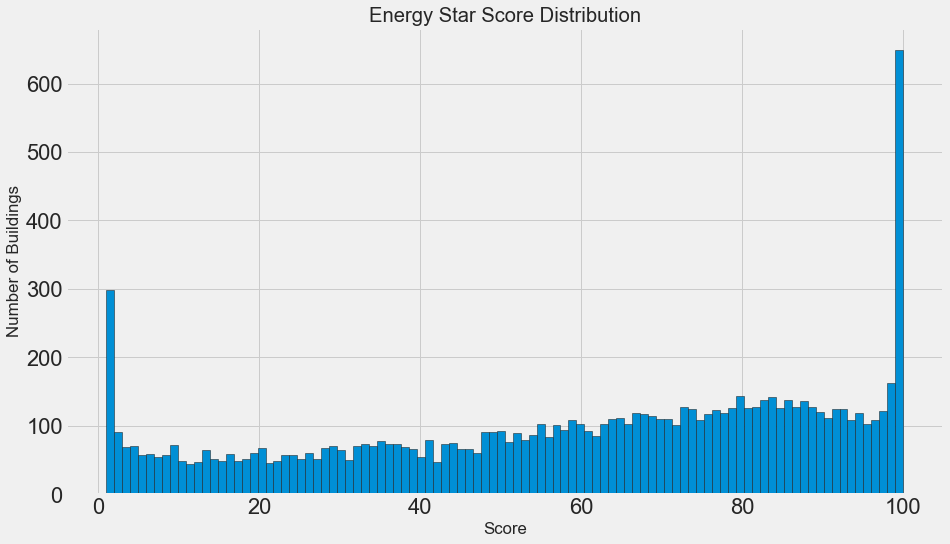

In [48]:
# Histogram of the Energy Star Score
plt.figure(figsize = (14,8))
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Our first plot has already revealed some surprising (and suspicious) information! As the Energy Star Score is a percentile rank, we would expect to see a completely flat distribution with each score making up 1% of the distribution (about 90 buildings). However, this is definitely not the case as we can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores.

If we go back to the definition of the score, we see it is based on self-reported energy usage. This poses a problem, because a building owner might be tempted to report lower electricity usage to artificially boost the score of their building. It is like giving students a grade based on self-reported test scores. This behavior would explain the high percentage of buildings with a perfect score of 100, but does not explain why so many buildings score at the very bottom!

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end.

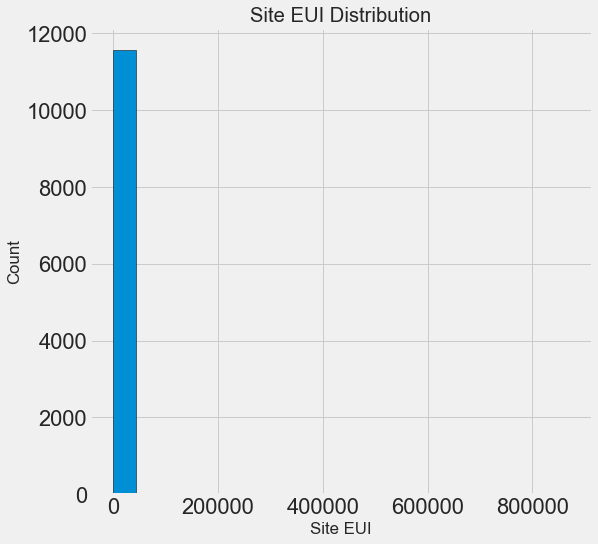

In [52]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site_EUI_(kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

Well this shows us we have another problem: outliers! The graph is incredibly skewed because of the presence of a few buildings with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.

In [53]:
data['Site_EUI_(kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site_EUI_(kBtu/ft²), dtype: float64

In [55]:
data['Site_EUI_(kBtu/ft²)'].dropna().sort_values().tail(10)

Order
3663      51328.8
3660      51831.2
3889      78360.1
10390     84969.6
3760      95560.2
10385    103562.7
10187    112173.6
4455     126307.4
10       143974.4
9984     869265.0
Name: Site_EUI_(kBtu/ft²), dtype: float64

Wow! One building is clearly far above the rest.

In [57]:
#lets check the building
data.loc[data['Site_EUI_(kBtu/ft²)'] == 869265]

,Property_Id,Property_Name,Parent_Property_Id,Parent_Property_Name,BBL_-_10_digits,"NYC_Borough,_Block_and_Lot_(BBL)_self-reported",NYC_Building_Identification_Number_(BIN),Address_1_(self-reported),Postal_Code,Street_Number,Street_Name,Borough,DOF_Gross_Floor_Area,Primary_Property_Type_-_Self_Selected,List_of_All_Property_Use_Types_at_Property,Largest_Property_Use_Type,Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²),Year_Built,Number_of_Buildings_-_Self-reported,Occupancy,Metered_Areas_(Energy),Metered_Areas__(Water),score,Site_EUI_(kBtu/ft²),Weather_Normalized_Site_EUI_(kBtu/ft²),Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²),Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²),Weather_Normalized_Source_EUI_(kBtu/ft²),Natural_Gas_Use_(kBtu),Weather_Normalized_Site_Natural_Gas_Use_(therms),Electricity_Use_-_Grid_Purchase_(kBtu),Weather_Normalized_Site_Electricity_(kWh),Total_GHG_Emissions_(Metric_Tons_CO2e),Direct_GHG_Emissions_(Metric_Tons_CO2e),Indirect_GHG_Emissions_(Metric_Tons_CO2e),Property_GFA_-_Self-Reported_(ft²),Water_Use_(All_Water_Sources)_(kgal),Water_Intensity_(All_Water_Sources)_(gal/ft²),Source_EUI_(kBtu/ft²),Release_Date,Water_Required?,DOF_Benchmarking_Submission_Status,Latitude,Longitude,Community_Board,Council_District,Census_Tract,NTA
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3.028938e+09,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234.0,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


This is Outliers, it can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data.

## Removing Outliers

In [58]:
# Calculate first and third quartile
first_quartile = data['Site_EUI_(kBtu/ft²)'].describe()['25%']
third_quartile = data['Site_EUI_(kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site_EUI_(kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site_EUI_(kBtu/ft²)'] < (third_quartile + 3 * iqr))]

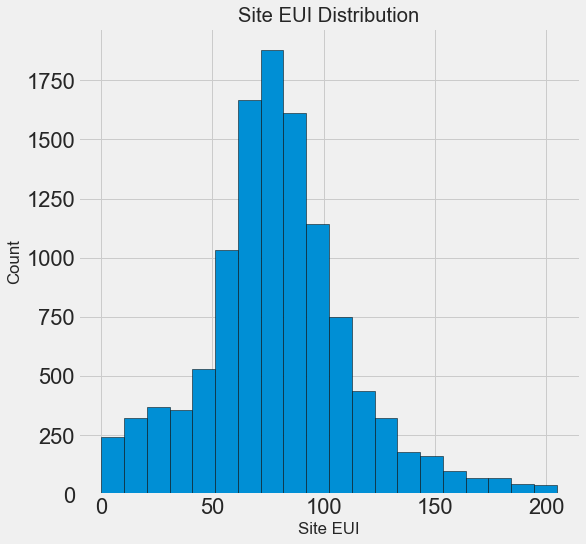

In [60]:
# Histogram Plot of Site EUI
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
plt.hist(data['Site_EUI_(kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).

Although this might be a more objective measure, our goal is still to predict the Energy Star Score, so we will move back to examining that variable. Even if the score is not a good measure, it is still our task to predict it, so that is what we will try to do!

## Looking for Relationships

In order to look at the effect of categorical variables on the score, we can make a density plot colored by the value of the categorical variable. Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class.

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset.

In [61]:
data['Largest_Property_Use_Type'].nunique()

48

In [62]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest_Property_Use_Type'].value_counts()
types = list(types[types.values > 100].index)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


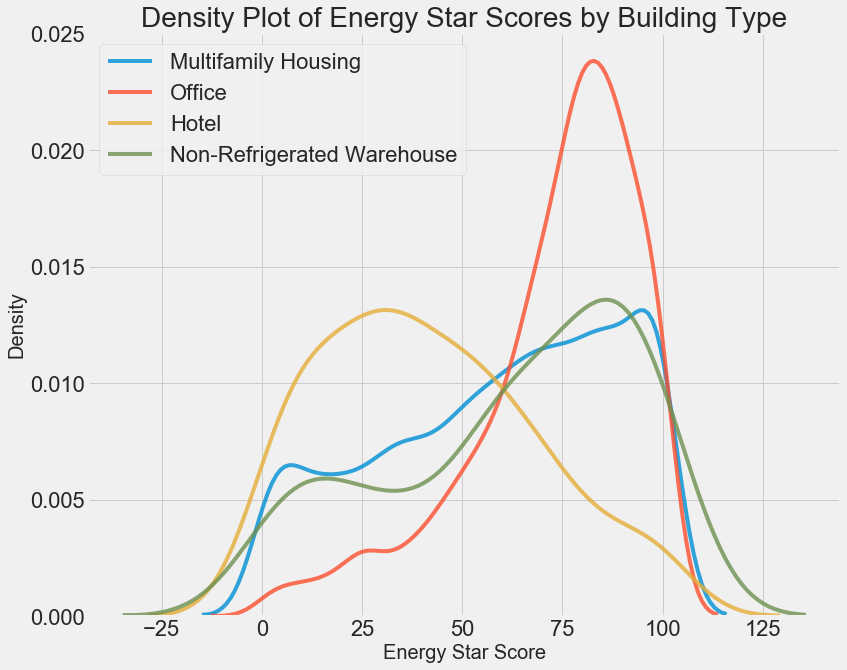

In [63]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest_Property_Use_Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);



From this graph, we can see that the building type does have an effect on the score (the negative scores on the graph are an artifact of the kernel density estimation procedure). While I was initially going to focus on the numerical columns for predicting the score, this graph tells us that we should include the property type because this information can be useful for determining the score. As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model.

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.


In [64]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

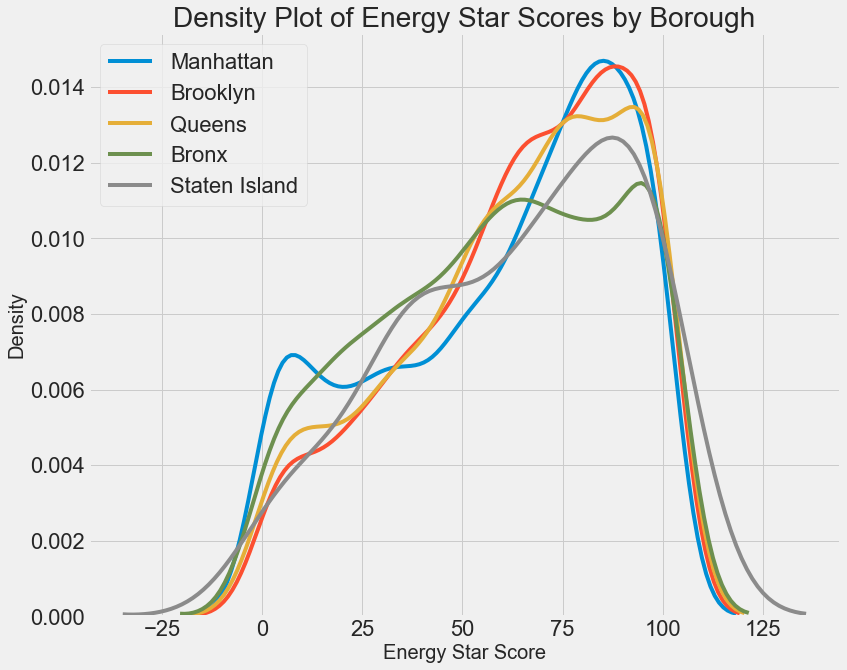

In [65]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);



The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable

## Correlations between Features and Target

The code below calculates the correlation coefficients between all the variables and the score.

In [67]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site_EUI_(kBtu/ft²)                                          -0.723864
Weather_Normalized_Site_EUI_(kBtu/ft²)                       -0.713993
Weather_Normalized_Source_EUI_(kBtu/ft²)                     -0.645542
Source_EUI_(kBtu/ft²)                                        -0.641037
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)      -0.358394
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)   -0.346046
Direct_GHG_Emissions_(Metric_Tons_CO2e)                      -0.147792
Weather_Normalized_Site_Natural_Gas_Use_(therms)             -0.135211
Natural_Gas_Use_(kBtu)                                       -0.133648
Year_Built                                                   -0.121249
Total_GHG_Emissions_(Metric_Tons_CO2e)                       -0.113136
Electricity_Use_-_Grid_Purchase_(kBtu)                       -0.050639
Weather_Normalized_Site_Electricity_(kWh)                    -0.048207
Latitude                                                     -0.048196
Proper



There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. This is a lot, but with pandas, it is straightforward to do each step!

In [68]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest_Property_Use_Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [69]:
# Display most negative correlations
correlations.head(15)

Site_EUI_(kBtu/ft²)                                            -0.723864
Weather_Normalized_Site_EUI_(kBtu/ft²)                         -0.713993
sqrt_Site_EUI_(kBtu/ft²)                                       -0.699817
sqrt_Weather_Normalized_Site_EUI_(kBtu/ft²)                    -0.689019
sqrt_Weather_Normalized_Source_EUI_(kBtu/ft²)                  -0.671044
sqrt_Source_EUI_(kBtu/ft²)                                     -0.669396
Weather_Normalized_Source_EUI_(kBtu/ft²)                       -0.645542
Source_EUI_(kBtu/ft²)                                          -0.641037
log_Source_EUI_(kBtu/ft²)                                      -0.622892
log_Weather_Normalized_Source_EUI_(kBtu/ft²)                   -0.620329
log_Site_EUI_(kBtu/ft²)                                        -0.612039
log_Weather_Normalized_Site_EUI_(kBtu/ft²)                     -0.601332
log_Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)    -0.424246
sqrt_Weather_Normalized_Site_Electricity_Intensity_

In [70]:
# Display most positive correlations
correlations.tail(15)

Largest_Property_Use_Type_Supermarket/Grocery Store                0.030038
Largest_Property_Use_Type_Residence Hall/Dormitory                 0.035407
log_BBL_-_10_digits                                                0.048060
Largest_Property_Use_Type_Hospital (General Medical & Surgical)    0.048410
sqrt_BBL_-_10_digits                                               0.049363
BBL_-_10_digits                                                    0.049963
Borough_Brooklyn                                                   0.050486
log_Community_Board                                                0.055495
Community_Board                                                    0.056612
sqrt_Community_Board                                               0.058029
sqrt_Council_District                                              0.060623
log_Council_District                                               0.061101
Council_District                                                   0.061639
Largest_Prop



After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.


## Two-Variable Plots

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


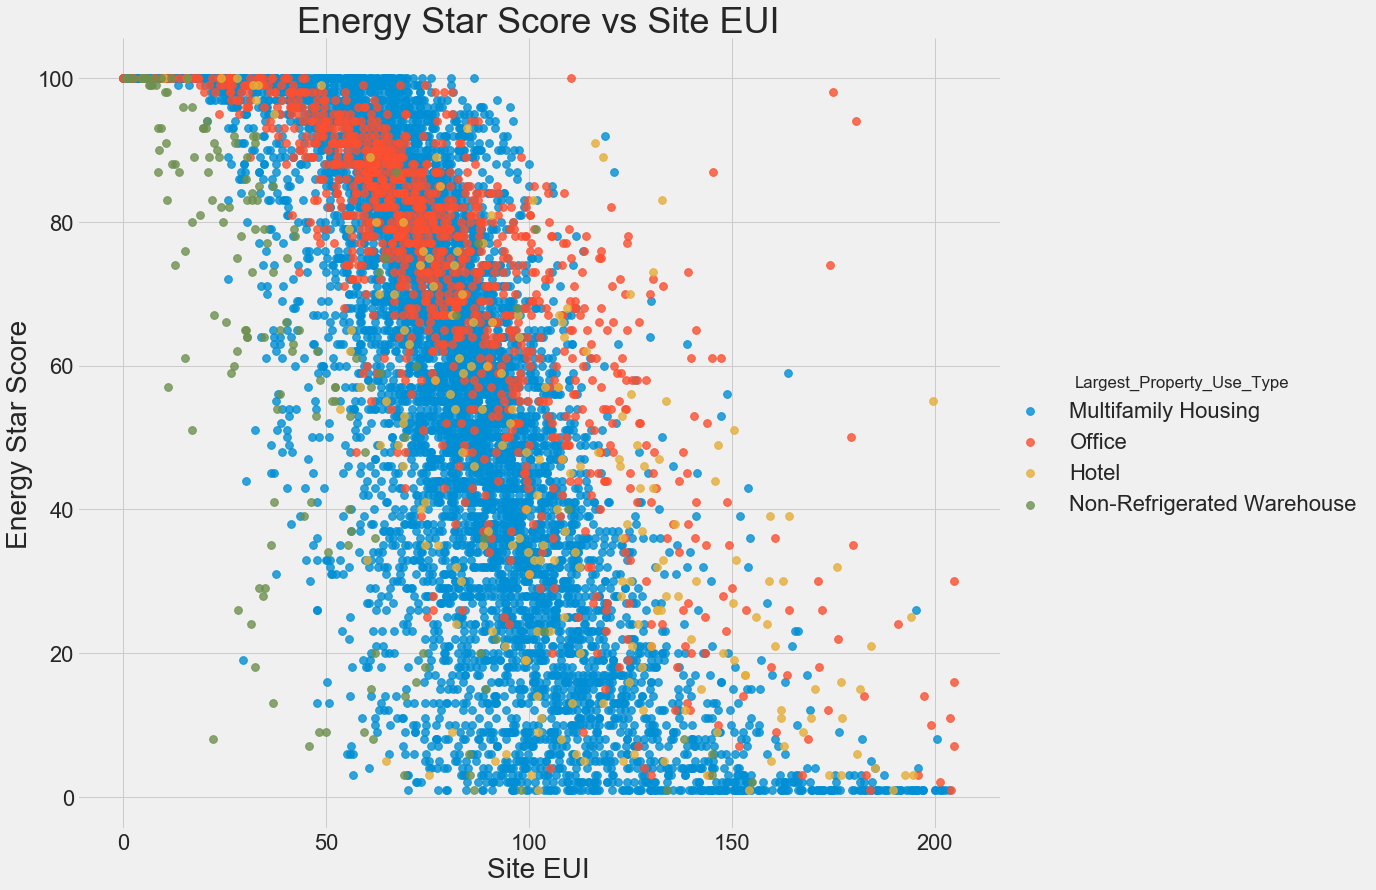

In [71]:
figsize(12, 10)

# Extract the building types
features['Largest_Property_Use_Type'] = data.dropna(subset = ['score'])['Largest_Property_Use_Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest_Property_Use_Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site_EUI_(kBtu/ft²)', 'score', 
          hue = 'Largest_Property_Use_Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.

In [ ]:
#sns.pairplot(data)


__Pairs Plot__

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


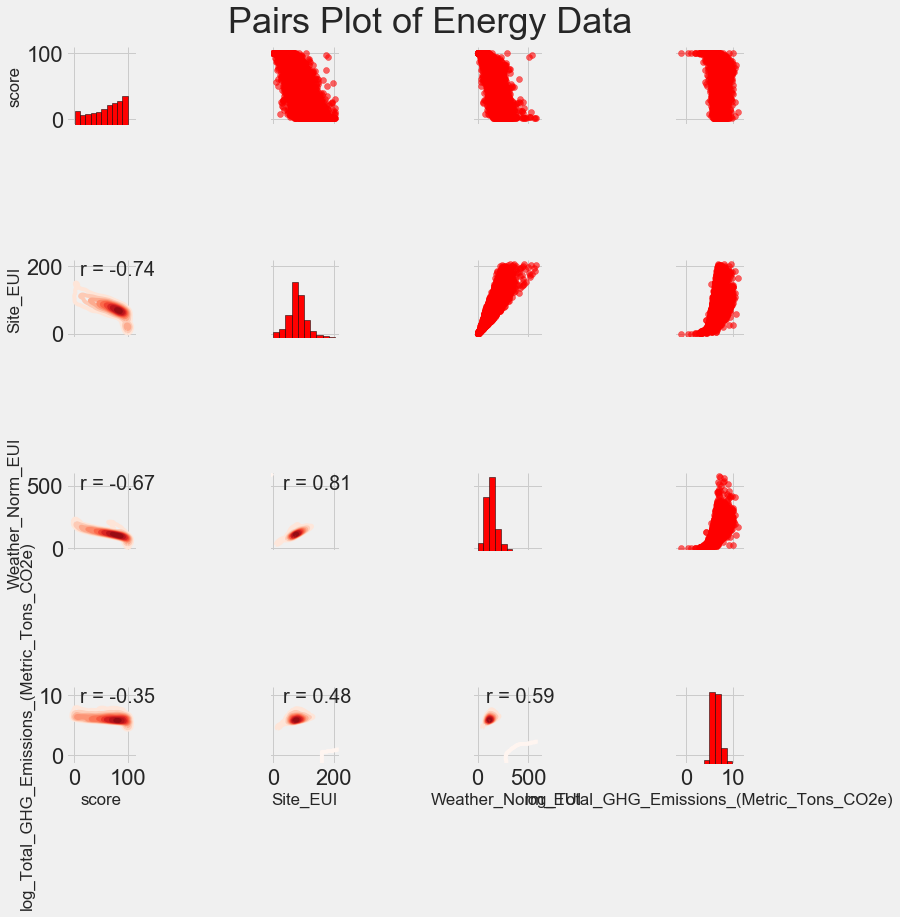

In [76]:
# Extract the columns to  plot
plot_data = features[['score', 'Site_EUI_(kBtu/ft²)', 
                      'Weather_Normalized_Source_EUI_(kBtu/ft²)', 
                      'log_Total_GHG_Emissions_(Metric_Tons_CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site_EUI_(kBtu/ft²)': 'Site_EUI', 
                                        'Weather_Normalized_Source_EUI_(kBtu/ft²)': 'Weather_Norm_EUI',
                                        'log_Total_GHG Emissions_(Metric_Tons_CO2e)': 'log_GHG_Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

## 3. Feature Engineering and Selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

    The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model.
    Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

    Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.
    
    Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

    Select only the numerical variables and two categorical variables (borough and property use type)
    Add in the log transformation of the numerical variables
    One-hot encode the categorical variables

For feature selection, we will do the following:

    Remove collinear features

We will discuss collinearity (also called multicollinearity) when we get to that process!

The following code selects the numeric features, adds in log transformations of all the numeric features, selects and one-hot encodes the categorical features, and joins the sets of features together.


In [77]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest_Property_Use_Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(11319, 112)

At this point, we have 11319 observations (buildings) with 111 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

## Remove Collinear Features

Highly collinear features have a significant correlation coefficent between them. For example, in our dataset, the Site EUI and Weather Norm EUI are highly correlated because they are just slightly different means of calculating the energy use intensity.

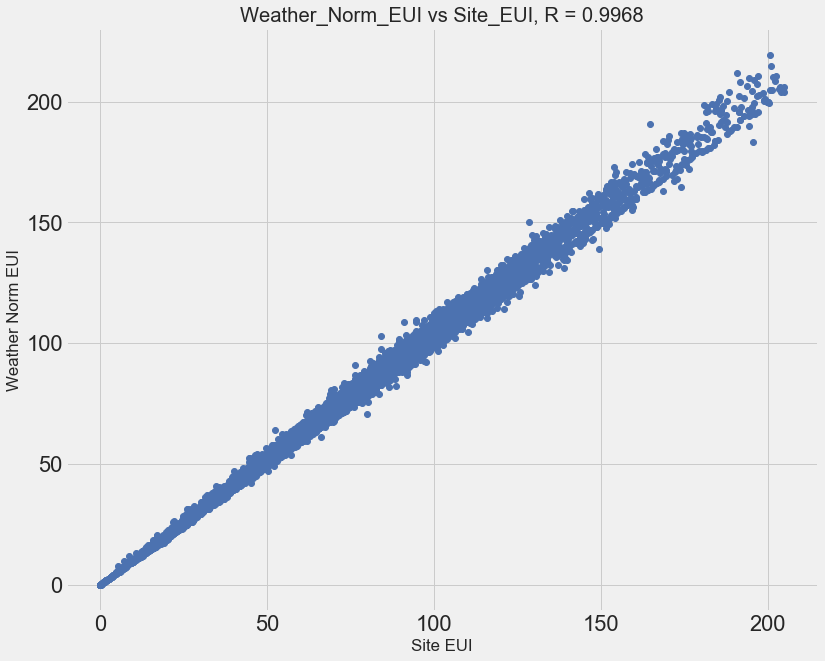

In [79]:
plot_data = data[['Weather_Normalized_Site_EUI_(kBtu/ft²)', 'Site_EUI_(kBtu/ft²)']].dropna()

plt.plot(plot_data['Site_EUI_(kBtu/ft²)'], plot_data['Weather_Normalized_Site_EUI_(kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather_Norm_EUI vs Site_EUI, R = %0.4f' % np.corrcoef(data[['Weather_Normalized_Site_EUI_(kBtu/ft²)', 'Site_EUI_(kBtu/ft²)']].dropna(), rowvar=False)[0][1]);



While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

There are a number of methods for removing collinear features, such as using the Variance Inflation Factor. We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other (not with the score because we want variables that are highly correlated with the score!) For a more thorough discussion of removing collinear variables, check out this notebook on Kaggle.

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

Again, I did not actually write this code from scratch, but rather adapted it from a Stack Overflow answer


In [82]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather_Normalized_Site_EUI_(kBtu/ft²)', 
                          'Water_Use_(All_Water_Sources)_(kgal)',
                          'log_Water_Use_(All_Water_Sources)_(kgal)',
                          'Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [83]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [84]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 66)

Our final dataset now has 65 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.


__Split Into Training and Testing Sets__

In machine learning, we always need to separate our features into two sets:

    Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
    Testing set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.

Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.


In [85]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 66)
(9461, 66)


In [86]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 65)
(2839, 65)
(6622, 1)
(2839, 1)



__Metric: Mean Absolute Error__

There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number. In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

The function below calculates the mean absolute error between true values and predictions.

In [87]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Now we can make the median guess and evaluate it on the test set.

In [88]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.4836


This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

### Conclusions

In this notebook, we carried out the first three steps of a machine learning problem:

    1. Cleaned and formatted the raw data
    2. Performed an exploratory data analysis
    3. Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing!

Hopefully, we are starting to get a sense of how each part of the pipeline flows into the next: cleaning the data and getting it into the proper format allows us to perform an exploratory data analyis. The EDA then informs our decisions in the feature engineering and selection stage. These three steps generally are performed in this order, although we may come back later and do more EDA or feature engineering based on our modeling results.

In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part.

In [91]:
# Save the no scores, training, and testing data
no_score.to_csv('data_no_score.csv', index = False)
X.to_csv('data_training_features.csv', index = False)
X_test.to_csv('data_testing_features.csv', index = False)
y.to_csv('data_training_labels.csv', index = False)
y_test.to_csv('data_testing_labels.csv', index = False)

## Move to part 2